In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from shapely.geometry import Point
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.cm as cm
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [3]:
master_df = pd.read_csv(r'maps/map_dataset.csv')
master_df.head()

,Unnamed: 0.2,objectid,LA code,lad17nm,lad17nmw,bng_e,bng_n,long,lat,st_areasha,...,FSM Eligible %,<2 A levels,< AAB,perm_excl_rate,Unsuccessful Appeals,% of ppl not doing degrees,progression_rate,total_pop,Unnamed: 0,"Average Rainfall (June, mm)"
0,0,1,E06000001,Hartlepool,NaN,447157,531476,-1.27023,54.676159,9.355951e+07,...,25.797120,29.545,89.831,7.240653,75.0,53.4,0.389333,5480.0,74.0,88.6
1,1,2,E06000002,Middlesbrough,NaN,451141,516887,-1.21099,54.544670,5.388858e+07,...,24.189824,36.743,90.881,17.357524,78.3,46.1,0.413947,7890.0,75.0,94.0
2,2,3,E06000003,Redcar and Cleveland,NaN,464359,519597,-1.00611,54.567520,2.448203e+08,...,17.971133,23.263,86.907,26.902558,58.2,23.0,0.374421,7550.0,76.0,89.0
3,3,4,E06000004,Stockton-on-Tees,NaN,444937,518183,-1.30669,54.556911,2.049622e+08,...,16.438313,22.014,81.560,12.734798,71.0,22.7,0.427333,10385.0,77.0,66.6
4,4,5,E06000005,Darlington,NaN,428029,515649,-1.56835,54.535351,1.974757e+08,...,16.558996,23.524,82.458,6.176271,71.2,35.8,0.390533,5635.0,95.0,71.2


In [4]:
complete_df= master_df.drop(columns=['objectid','Unnamed: 0.1','LA code','GDHI income index','lad17nm','lad17nmw','bng_e','bng_n','st_areasha','st_lengths', 'geometry','Unnamed: 0.2'])
print(complete_df.columns)
complete_df.dropna(inplace=True)
print(complete_df.dtypes)
X = complete_df.drop(columns=['lonely_avg'])
# X = X[['Ofsted Avg','FSM Eligible %','< AAB','progression_rate','Average Rainfall (June, mm)']]
y = complete_df[['lonely_avg']]


Index(['long', 'lat', 'Ofsted Avg', 'lonely_avg', 'KS2 metrics PCA',
       'LA flow rate', 'All Ages', 'meds', 'old%', 'young%', '3rd Pref %P',
       'Non Preferred Offer %P', 'No Offer %P', 'Offer in diff LA code %P',
       '3rd Pref %S', 'Non Preferred Offer %S', 'No Offer %S',
       'Offer in diff LA code %S', 'FSM Eligible %', '<2 A levels', '< AAB',
       'perm_excl_rate', 'Unsuccessful Appeals', '% of ppl not doing degrees',
       'progression_rate', 'total_pop', 'Unnamed: 0',
       'Average Rainfall (June, mm)'],
      dtype='object')
long                           float64
lat                            float64
Ofsted Avg                     float64
lonely_avg                     float64
KS2 metrics PCA                float64
LA flow rate                   float64
All Ages                       float64
meds                           float64
old%                           float64
young%                         float64
3rd Pref %P                    float64
Non Preferred Of

In [5]:
from sklearn import tree
import graphviz
import pydotplus
import matplotlib.image as mpimg
score = 0
trees = []
X_sub, X_val, y_sub, y_val = train_test_split(X, y, test_size = 0.05) 
while len(trees)<4:
    X_train, X_test, y_train, y_test = train_test_split(X_sub, y_sub, test_size = 0.2) 
    clf_model = DecisionTreeRegressor(max_depth=3, min_samples_leaf=10)   
    clf_model.fit(X_train,y_train)
    y_predict = clf_model.predict(X_test)
    score = clf_model.score(X_test,y_test)
    if score >0.6:
        trees.append(clf_model)
print('done')
print(score)
print(clf_model.score(X_val,y_val))

done
0.6059316325951887
-0.21935032516317765


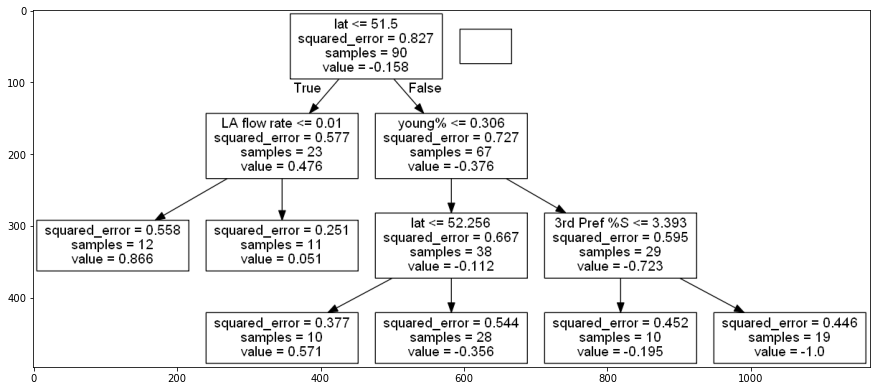

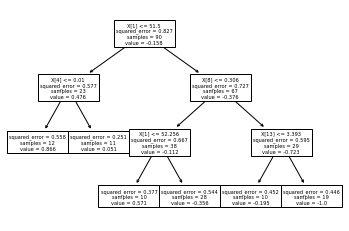

In [6]:
for clf_model in trees:
    feature_names = list(X.columns)
    dot_data = tree.export_graphviz(clf_model,
                                    out_file=None, 
                          feature_names=feature_names,    
                          )  
    graph = graphviz.Source(dot_data)
    pydot_graph = pydotplus.graph_from_dot_data(dot_data).write_png('decision_tree.png')
    plt.figure(figsize=(15,15))
    img = mpimg.imread('decision_tree.png')
    imgplot = plt.imshow(img)

    plt.show()
    tree.plot_tree(clf_model)


In [9]:
from sklearn.ensemble import RandomForestRegressor
valscore =0
while valscore <0.4:
    score=0
    X_sub, X_val, y_sub, y_val = train_test_split(X, y, test_size = 0.05) 
    while score <0.45:
        regr = RandomForestRegressor(max_depth=3,min_samples_leaf=4)
        X_train, X_test, y_train, y_test = train_test_split(X_sub, y_sub, test_size = 0.2) 
        regr.fit(X_train,y_train.values.ravel())
        score = regr.score(X_test,y_test)
    print(score)
    valscore = regr.score(X_val,y_val)
    print(valscore)
    print('\n')

0.4522956538075126
-0.20894430708951006


0.47429106299127144
0.356732097316238


0.45618299749162516
0.1329144217872652


0.47593664593641005
0.7455686642458372


